# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
# Sklearn Library
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings # ignore all warnings
warnings.filterwarnings('ignore')

# Importing data

In [2]:
data = pd.read_csv("cancer_patient_dataset.csv")
data.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [3]:
data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


# Exploring data

In [5]:
data.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [6]:
data.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

In [8]:
data.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [9]:
data.describe(include = "all")

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,NaN
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,NaN
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,NaN
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,NaN


In [10]:
# Changing the categorical values to numerical values helps  to explore the data without hassle. 

# A  code that will encode all the categorical columns
le = preprocessing.LabelEncoder()

for col in list(data.columns):
    if data[col].dtype == object:
        print("Column Name: \t\t", col)
        print("Unique Values: \t\t", list(data[col].unique()) )
        print("Length: \t\t", len(data[col].unique()))
        
        data[col]= le.fit_transform(data[col])
        print("Encoding Done Sucessfully :) ")
        print()

Column Name: 		 Level
Unique Values: 		 ['Low', 'Medium', 'High']
Length: 		 3
Encoding Done Sucessfully :) 



In [11]:
data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,0
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,0
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,0
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,0
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,0
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,0


In [12]:
# Length of dataframe
len(data)

1000

# Multiple Linear Regression

In [13]:
# Seperating the features and the output 
X = data.drop("Level", axis = 1)
y = data["Level"]

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [15]:
X.shape, y.shape

((1000, 23), (1000,))

In [16]:
#Concept of splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [17]:
model.fit(X_train,y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

Intercept 1.0484596600209668
Coefficients : 


[('Age', 0.01076879872972372),
 ('Gender', 0.015824118157182567),
 ('Air Pollution', -0.12079478980566312),
 ('Alcohol use', -0.09304345312221993),
 ('Dust Allergy', 0.2789719865255508),
 ('OccuPational Hazards', -0.09314623905451458),
 ('Genetic Risk', 0.07164852364796881),
 ('chronic Lung Disease', 0.050068419996235944),
 ('Balanced Diet', -0.06279405168520102),
 ('Obesity', -0.010680562406120963),
 ('Smoking', -0.0505279937306596),
 ('Passive Smoker', -0.1349461738567564),
 ('Chest Pain', 0.014262914004773194),
 ('Coughing of Blood', -0.055074143633806964),
 ('Fatigue', -0.08259536651720141),
 ('Weight Loss', -0.003476749607989825),
 ('Shortness of Breath', 0.020293042198686915),
 ('Wheezing', 0.019707540332357963),
 ('Swallowing Difficulty', 0.041765541474586415),
 ('Clubbing of Finger Nails', 0.03554682997989458),
 ('Frequent Cold', -0.020896291272014797),
 ('Dry Cough', -0.08064877228133716),
 ('Snoring', 0.1390010993072362)]

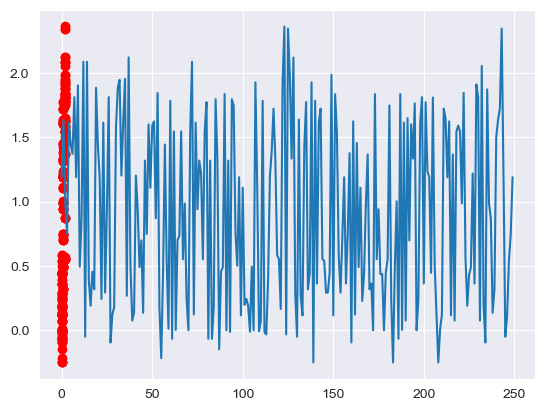

In [19]:
plt.scatter(y_test,y_pred,color='r')
plt.plot(y_pred)
print("Intercept",model.intercept_)
print("Coefficients : ")
list(zip(X,model.coef_))

# Predicting Values

In [21]:
predicted = model.predict([[33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4]])
if predicted <=1 :
    print("The level of your survival is Low")
elif predicted <=2:
    print("The level of your survival is Medium")
else:
    print("The level of your survival is High")

The level of your survival is Medium


In [22]:
predicted = model.predict([[47,1,6,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2]])
if predicted <=1 :
    print("The level of your survival is Low")
elif predicted <=2:
    print("The level of your survival is Medium")
else:
    print("The level of your survival is High")

The level of your survival is Low


# Checking perfomance 😎

In [23]:
from sklearn.metrics import r2_score
from sklearn import metrics
r2 = r2_score(y_test,y_pred)
print("R=Square:",r2*100)
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean square error:',metrics.mean_squared_error(y_test,y_pred))
print('Root mean square error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R=Square: 72.00095414304488
Mean Absolute Error: 0.31729330203629
Mean square error: 0.18333327242400504
Root mean square error: 0.42817434816206007


# Principal Component Analysis

In [24]:
#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler()
le = LabelEncoder()
scaled_data = pd.DataFrame(scalar.fit_transform(X)) #scaling the data
target_encoded = le.fit_transform(y)
scaled_data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.347848,-0.819903,-0.906679,-0.214954,-0.083340,-0.398718,-0.743202,-1.288162,-1.167040,-0.218941,...,-0.353971,-0.381548,0.065746,-0.980760,-0.870694,-0.328743,-1.224625,-0.838618,-0.418550,0.728655
1,-1.681238,-0.819903,-0.413919,-1.360357,-0.083340,-0.873383,-0.272821,-1.288162,-1.167040,-1.160623,...,-0.766045,-1.273014,-0.387677,1.208436,2.069186,0.993281,-0.805663,-1.384593,1.544171,-0.628245
2,-0.181174,-0.819903,0.078842,0.166847,0.421751,0.075946,0.197560,-0.205673,0.706970,1.193582,...,1.294323,1.847119,1.426018,2.084114,-0.870694,-1.210093,0.032260,1.345283,1.544171,-0.628245
3,-0.014501,-0.819903,1.557123,0.930449,0.926842,1.025275,0.667941,1.418061,1.175473,1.193582,...,1.294323,0.064186,-0.841101,-0.542921,-1.360675,0.111931,0.451222,1.345283,1.544171,1.407105
4,0.735531,-0.819903,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,1.193582,...,1.706397,-0.381548,-0.841101,-0.105081,-1.360675,0.111931,-0.805663,0.253332,-0.909231,0.050205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.568858,-0.819903,1.064362,0.930449,0.926842,1.025275,1.138323,0.876816,1.175473,1.193582,...,0.882250,0.509919,-0.387677,-0.980760,1.579206,1.874630,-0.805663,0.253332,0.562810,0.050205
996,-0.014501,1.219657,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,1.193582,...,0.882250,2.292852,0.972594,0.332758,1.579206,-0.769418,0.032260,-0.292643,-1.399911,0.728655
997,-1.014543,1.219657,0.078842,0.166847,0.421751,0.075946,0.197560,-0.205673,0.706970,1.193582,...,1.294323,1.847119,1.426018,2.084114,-0.870694,-1.210093,0.032260,1.345283,1.544171,-0.628245
998,-1.597901,1.219657,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,1.193582,...,1.706397,-0.381548,-0.841101,-0.105081,-1.360675,0.111931,-0.805663,0.253332,-0.909231,0.050205


In [25]:
from sklearn.decomposition import PCA
import numpy as np
#Apply PCA
#inititalise
pca = PCA(n_components = 10)
#fit
pca.fit(data)

PCA(n_components=10)

In [26]:
#print each principal component
for i,component in enumerate(pca.components_):
    print(f'principal component {i}')
    print(component)
    print()

principal component 0
[ 9.96934172e-01 -8.52839130e-03  2.14056412e-02  3.99595051e-02
  1.05373858e-02  1.62699938e-02  1.85392167e-02  2.41506644e-02
  5.58706672e-03  1.10965606e-02  1.98332066e-02  5.40005584e-03
  7.67349980e-03  1.61849127e-02  2.06376776e-02  2.16858449e-02
  1.02069408e-02 -1.56145249e-02 -2.06524942e-02  1.02894436e-02
 -7.13421148e-04  3.81316896e-03 -3.71727253e-04  1.54394954e-03]

principal component 1
[-0.06124448 -0.01523709  0.23006431  0.34838495  0.25044839  0.27952795
  0.28860849  0.22354545  0.27061543  0.27285505  0.24815849  0.27119545
  0.29419132  0.29830942  0.15246686  0.07983135  0.15782837  0.0606406
  0.0300692   0.10139732  0.07140441  0.09095526  0.02675369 -0.07589005]

principal component 2
[-0.01347365  0.00523395  0.01029805  0.06876852  0.12151079  0.02650064
  0.04640646 -0.05704173 -0.10882551  0.00679331 -0.36756398 -0.2333546
 -0.15621465 -0.13249372  0.13336893  0.41429727  0.44049123  0.19320577
 -0.14911641  0.43937174  0.167

# Scree Plot

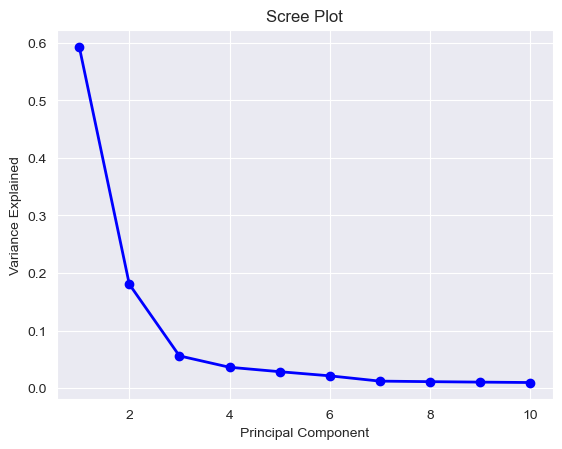

In [27]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# Reduced Data Set

In [29]:
#Applying PCA
#Taking no. of Principal Components as 3
pca = PCA(n_components = 2)
pca.fit(data)
data_pca = pca.transform(data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
data_pca

,PC1,PC2
0,-4.430990,-5.286940
1,-20.664580,-4.539981
2,-1.797406,3.681554
3,0.334651,8.448772
4,9.297824,7.677500
...,...,...
995,7.094883,7.704117
996,0.455587,9.402731
997,-11.775276,4.278762
998,-18.624861,9.377109


In [30]:
matrix = data_pca.corr()
matrix

,PC1,PC2
PC1,1.000000e+00,9.413831e-15
PC2,9.413831e-15,1.000000e+00


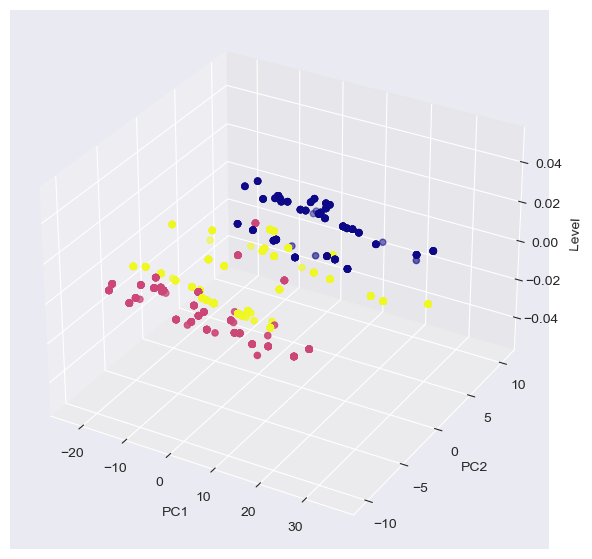

In [34]:
# 3D Graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7, 7))
axis = fig.add_subplot(111, projection= '3d')
axis.scatter(data_pca.iloc[:,0],data_pca.iloc[:,1] , c= target_encoded, cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("Level",fontsize=10)
plt.show()

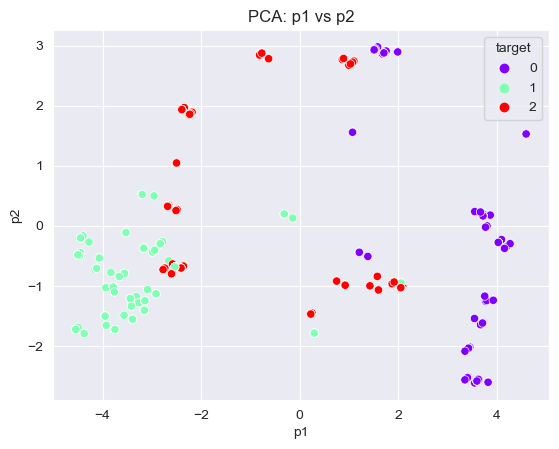

In [36]:
# dimension reduction with PCA
pca = PCA(n_components = 2)
xReducedPca = pca.fit_transform(scaled_data)
pcaData = pd.DataFrame(xReducedPca, columns = ["p1", "p2"])
pcaData["target"] = y
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = pcaData,palette="rainbow")
plt.title("PCA: p1 vs p2")
plt.show()

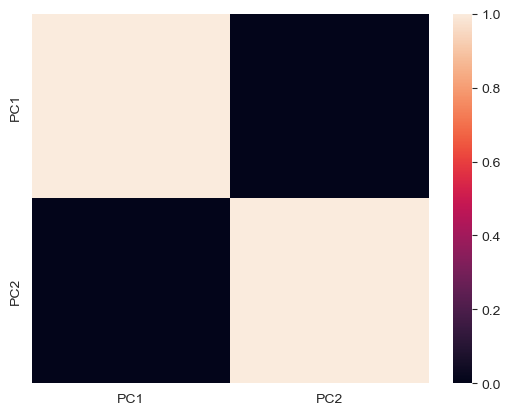

In [37]:
# plotting correlation heatmap
dataplot=sns.heatmap(data_pca.corr())
  
# displaying heatmap
plt.show()

In [38]:
pca.explained_variance_ratio_

array([0.39580565, 0.11740061])

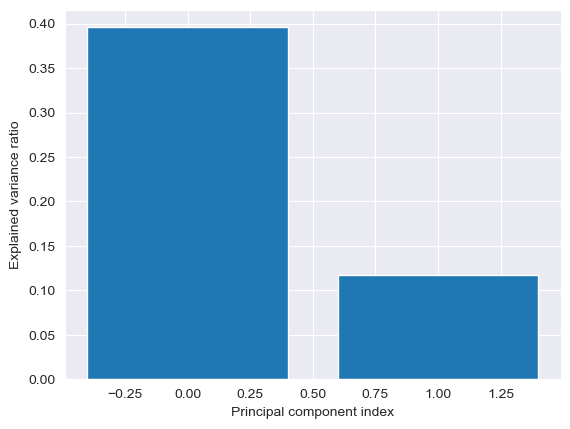

In [39]:
# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_
# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)),exp_var_pca)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.show()

# Correlation matrix

In [40]:
matrix = data.corr()
matrix

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
Age,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,0.034337,...,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700,0.042631
Gender,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,-0.123813,...,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618,0.086222
Air Pollution,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,0.601468,...,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343,-0.577269
Alcohol use,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,0.669312,...,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694,-0.434071
Dust Allergy,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,0.700676,...,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844,-0.264926
OccuPational Hazards,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,0.722191,...,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916,-0.363748
Genetic Risk,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,0.729826,...,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831,-0.423382
chronic Lung Disease,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,0.601754,...,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375,-0.432405
Balanced Diet,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,0.706922,...,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677,-0.618781
Obesity,0.034337,-0.123813,0.601468,0.669312,0.700676,0.722191,0.729826,0.601754,0.706922,1.000000,...,0.552788,0.313495,0.406203,0.094287,0.127213,0.149093,0.288368,0.200618,0.039422,-0.561961


In [41]:
#negative correlation 
matrix.Level.nsmallest(1).iloc[[-1]]

Passive Smoker   -0.638409
Name: Level, dtype: float64

In [42]:
#negative correlation 
matrix.Level.nsmallest(2).iloc[[-1]]

Coughing of Blood   -0.631118
Name: Level, dtype: float64

Text(222.31597222222223, 0.5, 'Features')

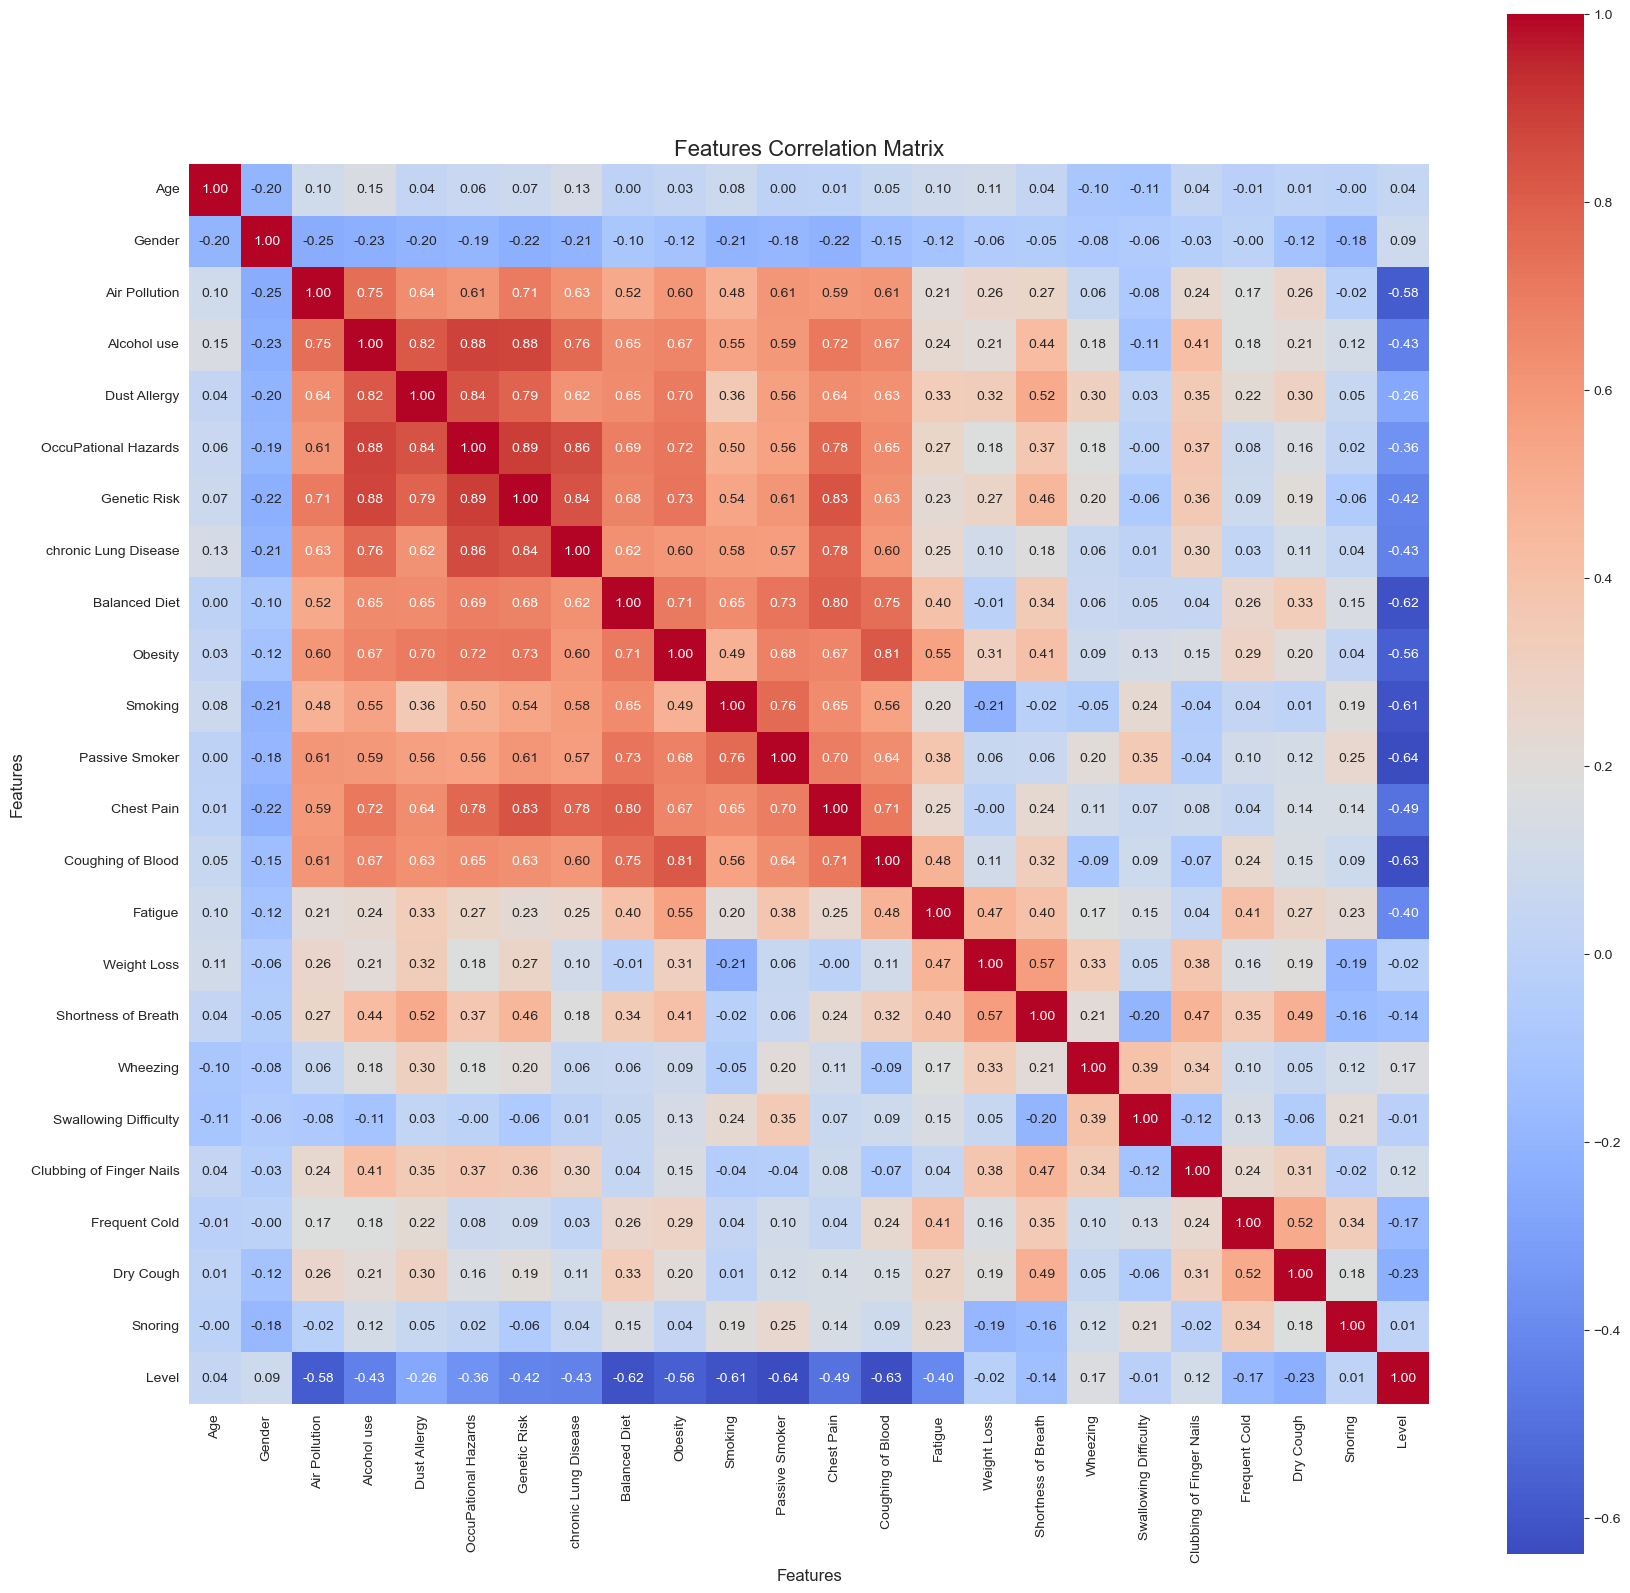

In [43]:
# Plotting a Heatmap to see in depth corrolation 
corr = data.corr() #Defining a corrolation variavle (Corrolation Matrix)
plt.figure(figsize=(20,20)) 
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', square=True)
# Adding title and labels to the plot
plt.title('Features Correlation Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

Text(222.31597222222223, 0.5, 'Features')

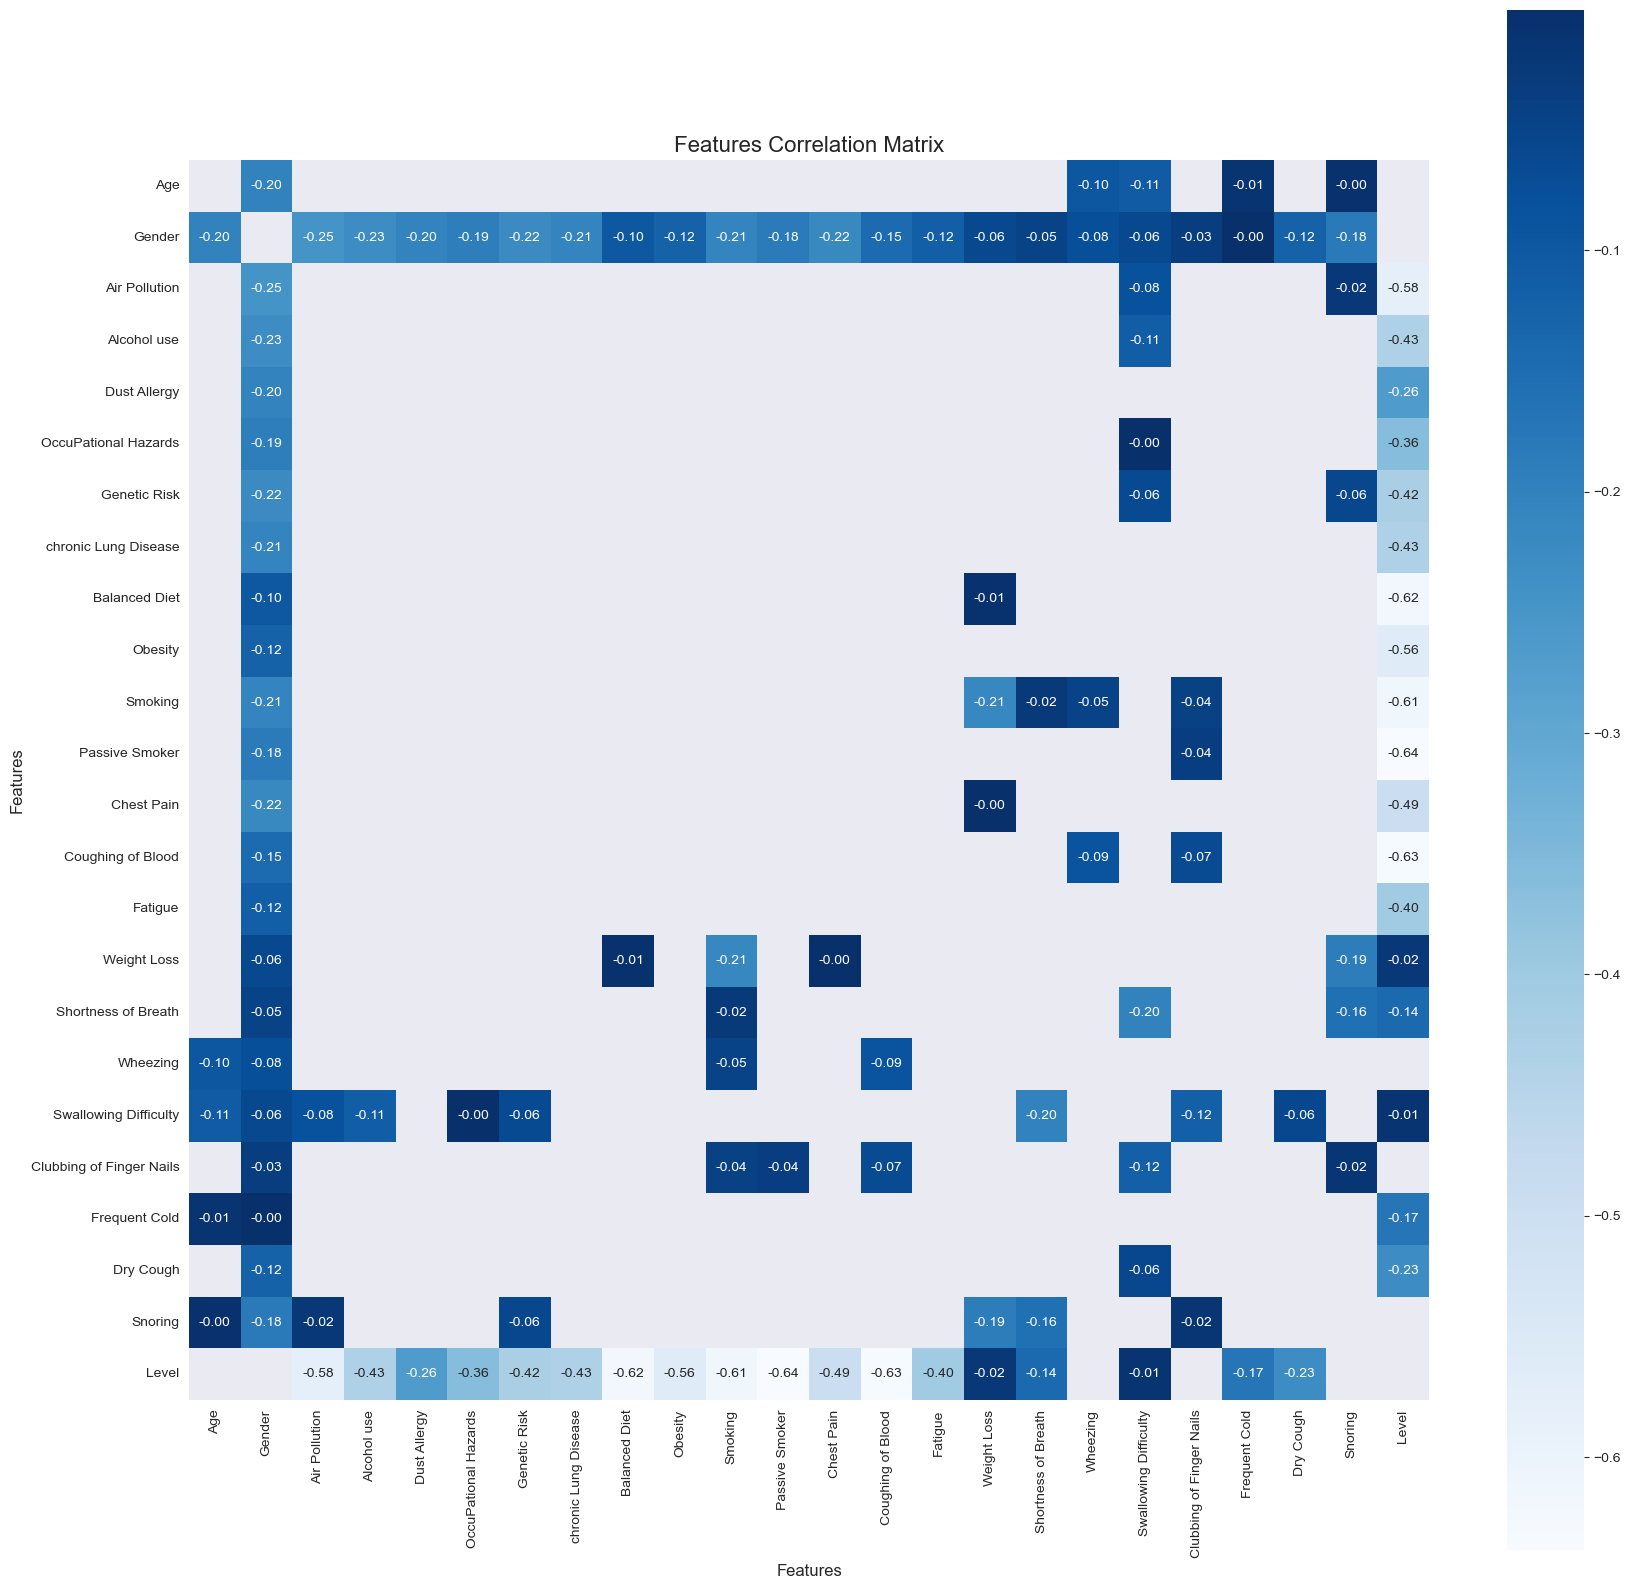

In [44]:
#Plotting a Heatmap to see in depth corrolation 
corr = data.corr() #Defining a corrolation variavle (Corrolation Matrix)
kot = corr[corr<0]
plt.figure(figsize=(20,20)) 
sns.heatmap(kot, annot=True, cmap='Blues', cbar=True, fmt='.2f', square=True)
# Adding title and labels to the plot
plt.title('Features Correlation Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

<AxesSubplot:xlabel='Gender', ylabel='Level'>

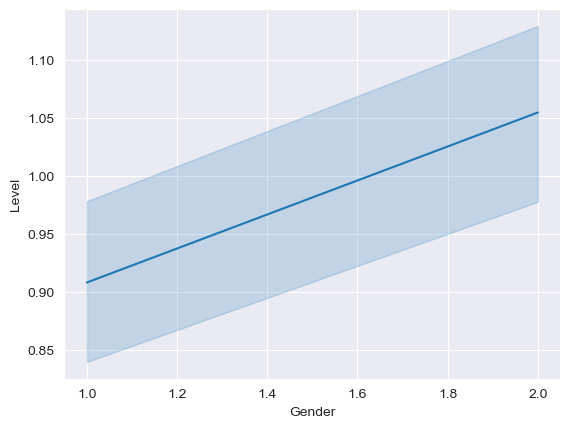

In [45]:
sns.lineplot(data = data, x='Gender' ,y='Level')

<AxesSubplot:xlabel='Dust Allergy', ylabel='Level'>

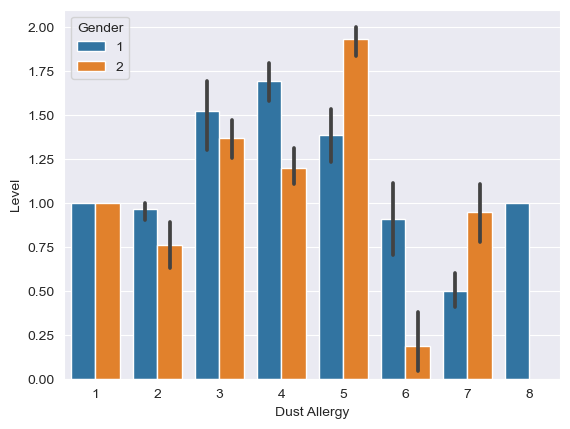

In [82]:
sns.barplot(x='Dust Allergy',y='Level', data=data,hue='Gender')

<AxesSubplot:xlabel='Smoking', ylabel='Level'>

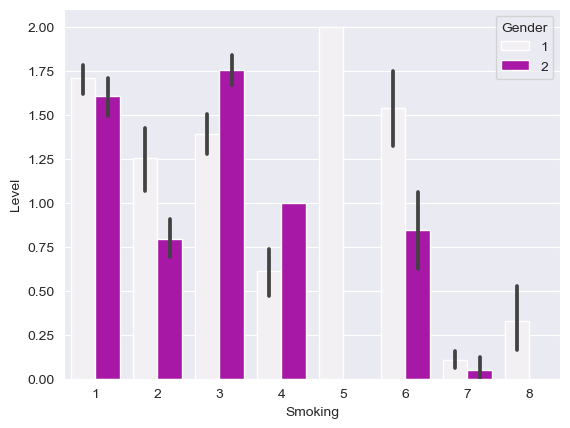

In [83]:
sns.barplot(x='Smoking',y='Level', data=data,hue='Gender',color='m')

<AxesSubplot:xlabel='Alcohol use', ylabel='Level'>

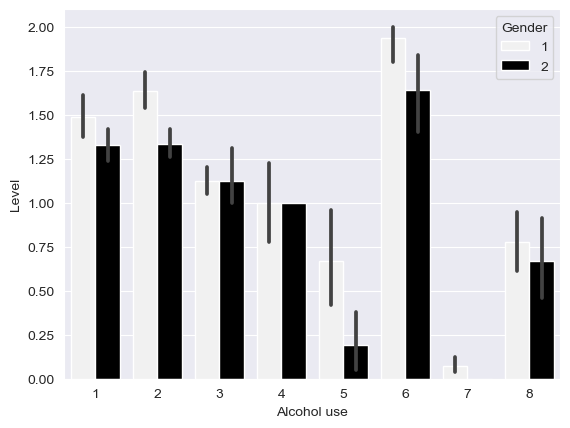

In [84]:
sns.barplot(x='Alcohol use',y='Level', data=data,hue='Gender',color='k')

<AxesSubplot:xlabel='Genetic Risk', ylabel='Count'>

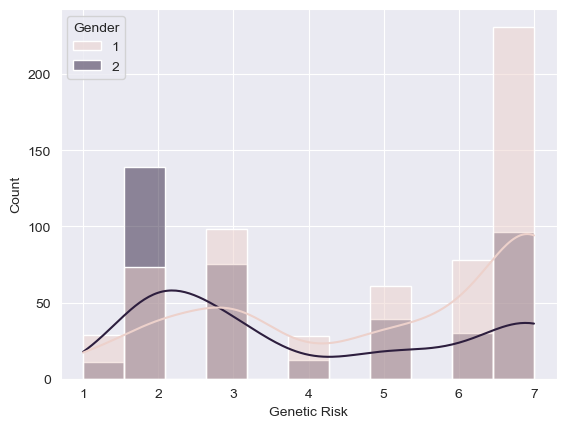

In [85]:
sns.histplot(x='Genetic Risk', data=data, kde=True, hue='Gender')

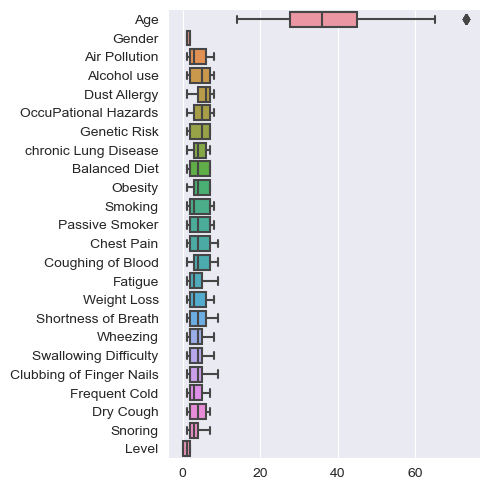

In [126]:
sns.catplot(data=data,orient="h",kind="box")

# Most Affected Parameters

<AxesSubplot:xlabel='Passive Smoker', ylabel='Level'>

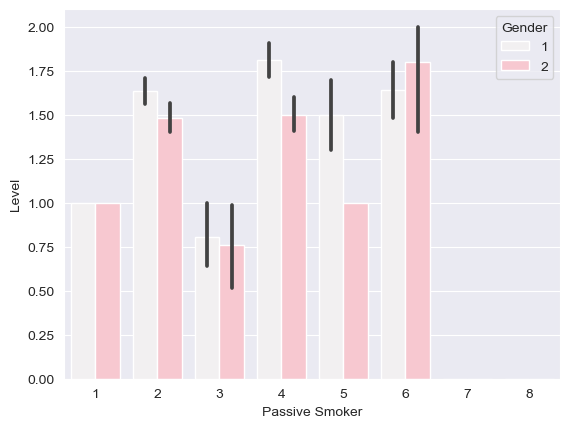

In [46]:
sns.barplot(x='Passive Smoker',y='Level', data=data,hue='Gender',color='pink')

<AxesSubplot:xlabel='Coughing of Blood', ylabel='Level'>

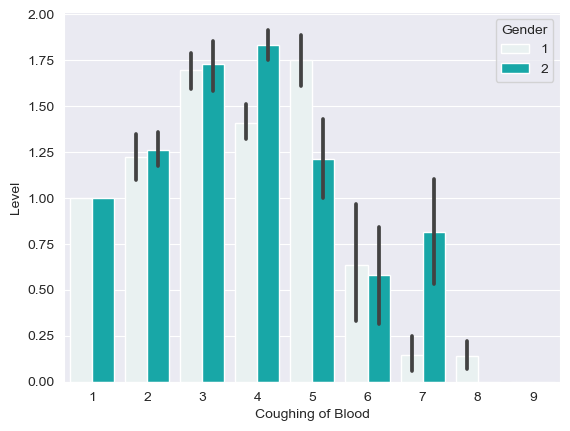

In [48]:
sns.barplot(x='Coughing of Blood',y='Level', data=data,hue='Gender',color='c')

<AxesSubplot:xlabel='Passive Smoker'>

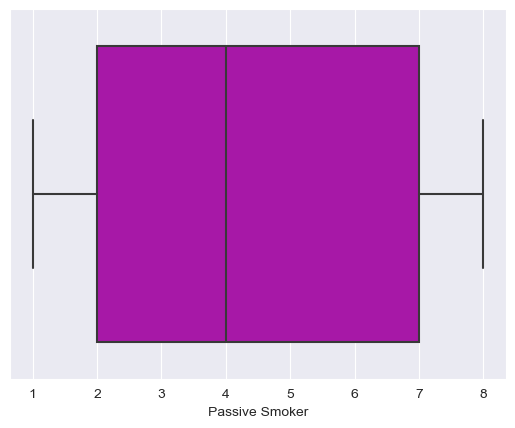

In [49]:
sns.boxplot(data=data, x="Passive Smoker",color="m")

<AxesSubplot:xlabel='Coughing of Blood'>

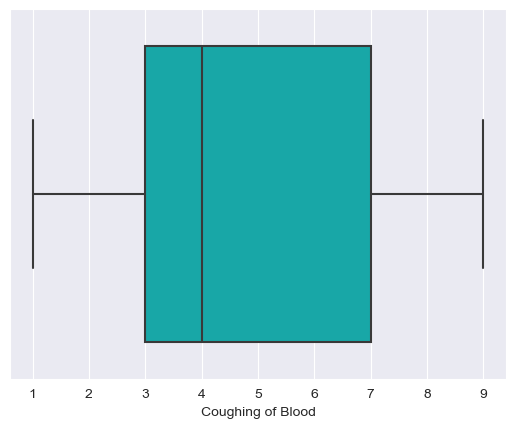

In [50]:
sns.boxplot(data=data, x="Coughing of Blood",color="c")

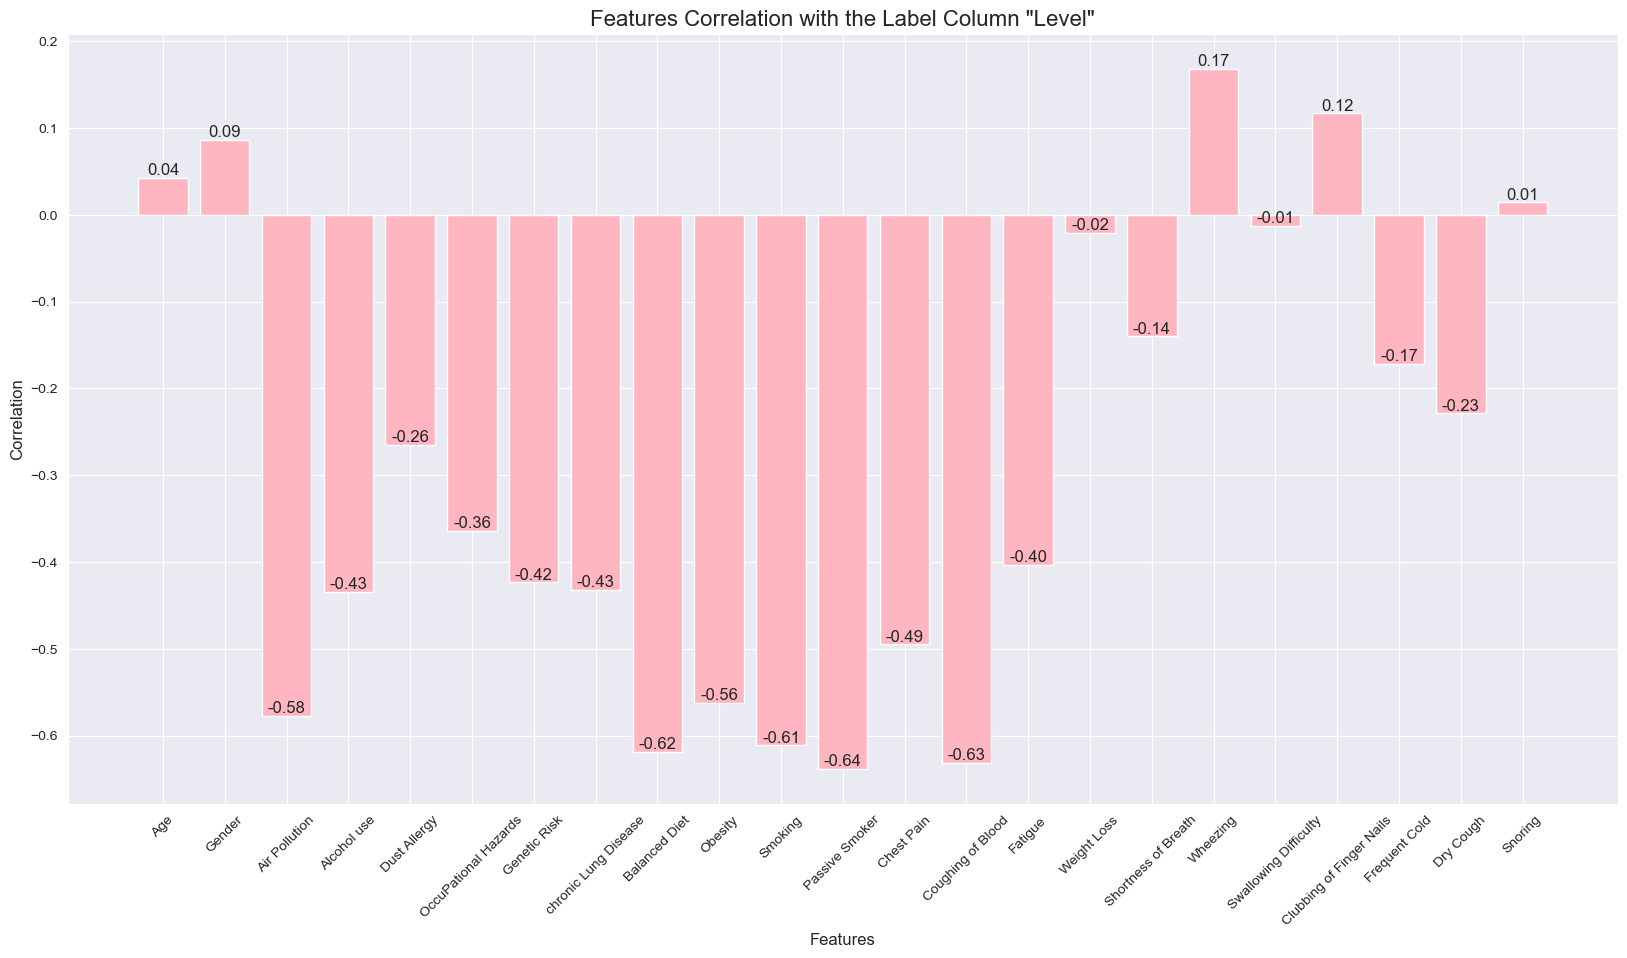

In [51]:
# Computing the correlation between the features and the label column
corrw = X.corrwith(data['Level'])
# Plotting the bar chart using matplotlib
plt.figure(figsize=(20, 10))
plt.bar(corrw.index, corrw.values, color='lightpink', edgecolor='white')
# Adding title, labels, and grid to the plot
plt.title('Features Correlation with the Label Column "Level"', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
# Adding annotations to the bars
for i, value in enumerate(corrw.values):
 label = f"{value:.2f}"
 plt.annotate(label, (i, value), ha='center', va='bottom', fontsize=12)
# Displaying the plot
plt.show()